In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.distance import geodesic

In [ ]:
data = pd.read_csv('uber.csv')

In [ ]:
data.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1.784800e+04,17847.000000,17847.000000,17847.000000,17847.000000,17847.000000,17847.000000
mean,2.765310e+07,11.417429,-72.595005,39.951854,-72.580938,39.952298,1.672830
std,1.599173e+07,10.173691,11.458450,6.095753,10.197475,6.096021,1.295875
min,4.800000e+01,2.500000,-748.016667,-74.009697,-75.350437,-74.008745,0.000000
25%,1.383501e+07,6.000000,-73.992000,40.734977,-73.991591,40.733933,1.000000
50%,2.755475e+07,8.500000,-73.981823,40.752377,-73.980073,40.752884,1.000000
75%,4.140304e+07,12.500000,-73.967328,40.767152,-73.963307,40.768318,2.000000
max,5.542169e+07,350.000000,40.770667,41.366138,40.828377,41.366138,6.000000


In [ ]:
data = data.dropna()

In [ ]:
def calculate_distance(row):
    pickup = (row['pickup_latitude'], row['pickup_longitude'])
    dropoff = (row['dropoff_latitude'], row['dropoff_longitude'])
    return geodesic(pickup, dropoff).km

In [ ]:
data['distance'] = data.apply(calculate_distance, axis=1)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


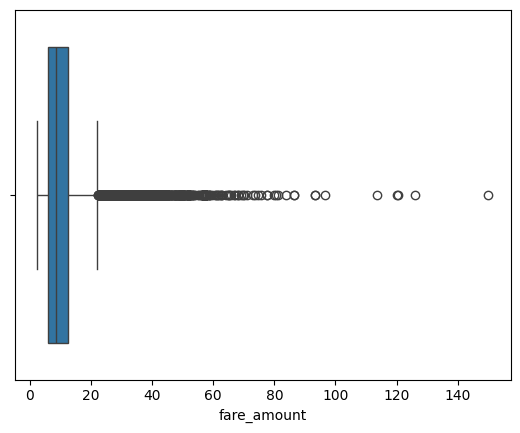

In [ ]:
data = data[data['distance'] > 0.1]

# Drop unnecessary columns if needed (such as 'Unnamed: 0')
data = data.drop(['Unnamed: 0'], axis=1)

# Boxplot visualization of fare amount to check for outliers
sns.boxplot(x=data['fare_amount'])
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


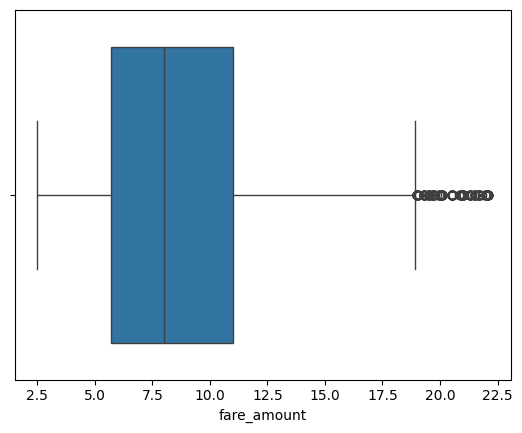

In [ ]:
# Using IQR to detect outliers in 'fare_amount'
Q1 = data['fare_amount'].quantile(0.25)
Q3 = data['fare_amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
data = data[(data['fare_amount'] >= lower_bound) & (data['fare_amount'] <= upper_bound)]

# Visualize the distribution after outlier removal
sns.boxplot(x=data['fare_amount'])
plt.show()


In [ ]:
# Check for non-numeric columns
non_numeric_cols = data.select_dtypes(exclude=[np.number]).columns
print(non_numeric_cols)


Index(['key', 'pickup_datetime'], dtype='object')


In [ ]:
data_numeric = data.select_dtypes(include=[np.number])


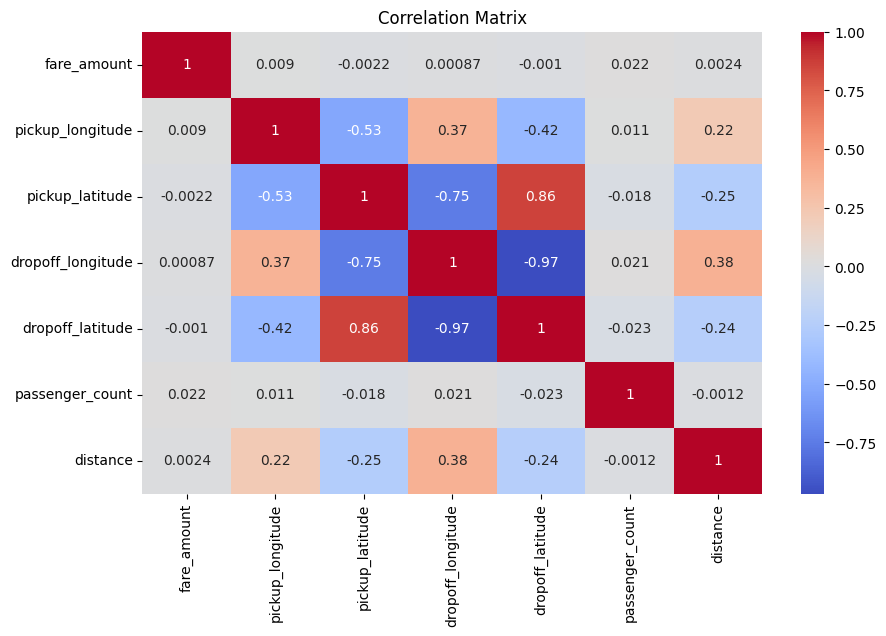

In [ ]:
correlation_matrix = data_numeric.corr()

# Visualize correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression

# Select features and target variable
X = data[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'distance']]
y = data['fare_amount']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predictions
y_pred_lin = lin_reg.predict(X_test)

# Evaluation metrics
r2_lin = r2_score(y_test, y_pred_lin)
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))

print(f"Linear Regression R2: {r2_lin}")
print(f"Linear Regression RMSE: {rmse_lin}")


Linear Regression R2: -0.0015022270203508548
Linear Regression RMSE: 4.109921860944951


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_reg.predict(X_test)

# Evaluation metrics
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f"Random Forest R2: {r2_rf}")
print(f"Random Forest RMSE: {rmse_rf}")


Random Forest R2: 0.6929280644247466
Random Forest RMSE: 2.2757663344394623
